In [1]:
import matplotlib.pyplot as plt
from tqdm import tqdm
import random
import pandas as pd
from cluster_comparison import  drop_na_values, perform_umap, perform_hdbscan, calculate_silhouette, plot_clusters

/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/d

In [2]:
# Sample data and demographics DataFrames, replace these with your actual DataFrames
raw_data = pd.read_csv('/Users/leo/Programming/PLR/Leo/data/cleaned_data_SYMPTOMS_9_13_23_DNA.csv')
data_symp_groups = pd.read_csv('data/skew_corr_groupadd.csv', usecols=['Grouped_Neuro_Sensory', 'Grouped_Cognitive_Memory', 'Grouped_Gastrointestinal', 'Grouped_Respiratory_Cardiac', 'Grouped_Eye_Vision'])
data_symp_groups_all = pd.read_csv('data/skew_corr_groupadd.csv')
demographics = pd.read_csv('/Users/leo/Programming/PLR/Leo/data/non_binary_data_processed.csv')

# combine demographics and data_symp_group_all 
demo_all = pd.concat([demographics, data_symp_groups_all], axis=1)

# combine demographics and data_symp_group
demo_groups = pd.concat([demographics, data_symp_groups], axis=1)

In [5]:


# Initialize the best score to a very low value
best_score = float('-inf')

# Initialize best parameters and dataset
best_params = {'n_neighbors': None, 'min_dist': None, 'min_cluster_size': None, 'n_components': None, 'dataset': None}

# Number of iterations
n_iterations = 10

# Datasets to consider
datasets = {'data_symp_groups_all': data_symp_groups_all, 'demo_all': demo_all, 'demo_groups': demo_groups, 'data_symp_groups': data_symp_groups}

# Initial ranges for hyperparameters
n_neighbors_range = [35, 45]  # refined around 39
min_dist_range = [0.15, 0.25]  # refined around 0.2003
min_cluster_size_range = [15, 20]  # refined around 17
n_components_range = [15, 21]  # refined around 18, but you might also want to explore 2 to 5


print("Starting optimization process...")
# Iteratively refine the hyperparameter space
for i in tqdm(range(n_iterations), desc="Optimizing"):
    # Randomly sample hyperparameters within the ranges
    n_neighbors = random.randint(*n_neighbors_range)
    min_dist = random.uniform(*min_dist_range)
    min_cluster_size = random.randint(*min_cluster_size_range)
    n_components = random.randint(*n_components_range)  # New hyperparameter
    dataset_name, dataset = random.choice(list(datasets.items()))
    
    # Drop NA values
    dataset = dataset.dropna()
    
    # Perform UMAP with the new n_components parameter
    umap_result = perform_umap(dataset, n_neighbors=n_neighbors, min_dist=min_dist, n_components=n_components)
    
    # Perform HDBSCAN
    labels = perform_hdbscan(umap_result, min_cluster_size=min_cluster_size)
    
    # Calculate the silhouette score
    score = calculate_silhouette(umap_result, labels)
    
    # Update the best score and best parameters if this score is better
    if score > best_score:
        best_score = score
        best_params['n_neighbors'] = n_neighbors
        best_params['min_dist'] = min_dist
        best_params['min_cluster_size'] = min_cluster_size
        best_params['n_components'] = n_components  # Store the best number of dimensions
        best_params['dataset'] = dataset_name
        
        # Narrow the ranges around the new best parameters
        n_neighbors_range = [max(n_neighbors - 5, 5), min(n_neighbors + 5, 50)]
        min_dist_range = [max(min_dist - 0.1, 0.0), min(min_dist + 0.1, 1.0)]
        min_cluster_size_range = [max(min_cluster_size - 5, 5), min(min_cluster_size + 5, 50)]
        
        print(f"\nNew Best Score Found! Score = {best_score}, Dataset = {dataset_name}, Params = {best_params}")

print("\nOptimization process completed.")
print(f"Best parameters: {best_params}")
print(f"Best silhouette score: {best_score}")


Starting optimization process...


Optimizing:  10%|█         | 1/10 [00:42<06:18, 42.07s/it]


New Best Score Found! Score = 0.9009915590286255, Dataset = data_symp_groups, Params = {'n_neighbors': 37, 'min_dist': 0.21681021147142068, 'min_cluster_size': 15, 'n_components': 18, 'dataset': 'data_symp_groups'}


Optimizing: 100%|██████████| 10/10 [04:26<00:00, 26.68s/it]


Optimization process completed.
Best parameters: {'n_neighbors': 37, 'min_dist': 0.21681021147142068, 'min_cluster_size': 15, 'n_components': 18, 'dataset': 'data_symp_groups'}
Best silhouette score: 0.9009915590286255


In [6]:
# Initialize the best score to a very low value
best_score = float('-inf')

# Initialize best parameters and dataset
best_params = {'n_neighbors': None, 'min_dist': None, 'min_cluster_size': None, 'n_components': None, 'dataset': None}

# Number of iterations
n_iterations = 750

# Datasets to consider
datasets = {'data_symp_groups_all': data_symp_groups_all}

# Initial ranges for hyperparameters
n_neighbors_range = [35, 45]  # refined around 39
min_dist_range = [0.15, 0.25]  # refined around 0.2003
min_cluster_size_range = [15, 20]  # refined around 17
n_components_range = [15, 21]  # refined around 18, but you might also want to explore 2 to 5


print("Starting optimization process...")
# Iteratively refine the hyperparameter space
for i in tqdm(range(n_iterations), desc="Optimizing"):
    # Randomly sample hyperparameters within the ranges
    n_neighbors = random.randint(*n_neighbors_range)
    min_dist = random.uniform(*min_dist_range)
    min_cluster_size = random.randint(*min_cluster_size_range)
    n_components = random.randint(*n_components_range)  # New hyperparameter
    dataset_name, dataset = random.choice(list(datasets.items()))
    
    # Drop NA values
    dataset = dataset.dropna()
    
    # Perform UMAP with the new n_components parameter
    umap_result = perform_umap(dataset, n_neighbors=n_neighbors, min_dist=min_dist, n_components=n_components)
    
    # Perform HDBSCAN
    labels = perform_hdbscan(umap_result, min_cluster_size=min_cluster_size)
    
    # Calculate the silhouette score
    score = calculate_silhouette(umap_result, labels)
    
    # Update the best score and best parameters if this score is better
    if score > best_score:
        best_score = score
        best_params['n_neighbors'] = n_neighbors
        best_params['min_dist'] = min_dist
        best_params['min_cluster_size'] = min_cluster_size
        best_params['n_components'] = n_components  # Store the best number of dimensions
        best_params['dataset'] = dataset_name
        
        # Narrow the ranges around the new best parameters
        n_neighbors_range = [max(n_neighbors - 5, 5), min(n_neighbors + 5, 50)]
        min_dist_range = [max(min_dist - 0.1, 0.0), min(min_dist + 0.1, 1.0)]
        min_cluster_size_range = [max(min_cluster_size - 5, 5), min(min_cluster_size + 5, 50)]
        
        print(f"\nNew Best Score Found! Score = {best_score}, Dataset = {dataset_name}, Params = {best_params}")

print("\nOptimization process completed.")
print(f"Best parameters: {best_params}")
print(f"Best silhouette score: {best_score}")


Starting optimization process...


Optimizing:   0%|          | 1/750 [00:08<1:47:30,  8.61s/it]


New Best Score Found! Score = 0.43147122859954834, Dataset = data_symp_groups_all, Params = {'n_neighbors': 35, 'min_dist': 0.17380014012123138, 'min_cluster_size': 17, 'n_components': 18, 'dataset': 'data_symp_groups_all'}


Optimizing:   0%|          | 2/750 [00:17<1:51:30,  8.94s/it]


New Best Score Found! Score = 0.4469853937625885, Dataset = data_symp_groups_all, Params = {'n_neighbors': 37, 'min_dist': 0.14017149413984126, 'min_cluster_size': 15, 'n_components': 21, 'dataset': 'data_symp_groups_all'}


Optimizing:   0%|          | 3/750 [00:26<1:51:18,  8.94s/it]


New Best Score Found! Score = 0.45060762763023376, Dataset = data_symp_groups_all, Params = {'n_neighbors': 35, 'min_dist': 0.1470935090013347, 'min_cluster_size': 14, 'n_components': 15, 'dataset': 'data_symp_groups_all'}


Optimizing:   1%|          | 6/750 [01:10<2:41:25, 13.02s/it]


New Best Score Found! Score = 0.6566586494445801, Dataset = data_symp_groups_all, Params = {'n_neighbors': 32, 'min_dist': 0.2312377720261963, 'min_cluster_size': 18, 'n_components': 19, 'dataset': 'data_symp_groups_all'}


Optimizing:   1%|          | 9/750 [01:37<2:05:49, 10.19s/it]


New Best Score Found! Score = 0.6579042673110962, Dataset = data_symp_groups_all, Params = {'n_neighbors': 31, 'min_dist': 0.16595525800575717, 'min_cluster_size': 23, 'n_components': 21, 'dataset': 'data_symp_groups_all'}


Optimizing:   2%|▏         | 12/750 [02:02<1:49:15,  8.88s/it]


New Best Score Found! Score = 0.6703274846076965, Dataset = data_symp_groups_all, Params = {'n_neighbors': 26, 'min_dist': 0.12691357112991428, 'min_cluster_size': 28, 'n_components': 21, 'dataset': 'data_symp_groups_all'}


Optimizing:   2%|▏         | 15/750 [02:25<1:39:11,  8.10s/it]


New Best Score Found! Score = 0.6768247485160828, Dataset = data_symp_groups_all, Params = {'n_neighbors': 21, 'min_dist': 0.21245095086042523, 'min_cluster_size': 29, 'n_components': 15, 'dataset': 'data_symp_groups_all'}


Optimizing:   3%|▎         | 24/750 [03:30<1:28:34,  7.32s/it]


New Best Score Found! Score = 0.680762767791748, Dataset = data_symp_groups_all, Params = {'n_neighbors': 20, 'min_dist': 0.16097850738502503, 'min_cluster_size': 24, 'n_components': 19, 'dataset': 'data_symp_groups_all'}


Optimizing:  42%|████▏     | 312/750 [36:38<49:14,  6.75s/it]  


New Best Score Found! Score = 0.6807907819747925, Dataset = data_symp_groups_all, Params = {'n_neighbors': 22, 'min_dist': 0.06590503689871743, 'min_cluster_size': 23, 'n_components': 19, 'dataset': 'data_symp_groups_all'}


Optimizing:  74%|███████▍  | 555/750 [1:04:08<21:45,  6.69s/it]


New Best Score Found! Score = 0.686838686466217, Dataset = data_symp_groups_all, Params = {'n_neighbors': 26, 'min_dist': 0.11259375493970955, 'min_cluster_size': 26, 'n_components': 17, 'dataset': 'data_symp_groups_all'}


Optimizing: 100%|██████████| 750/750 [1:27:11<00:00,  6.98s/it]


Optimization process completed.
Best parameters: {'n_neighbors': 26, 'min_dist': 0.11259375493970955, 'min_cluster_size': 26, 'n_components': 17, 'dataset': 'data_symp_groups_all'}
Best silhouette score: 0.686838686466217


Silhouette score for the first dataframe: 0.920039176940918
Silhouette score for the second dataframe: 0.4577239453792572


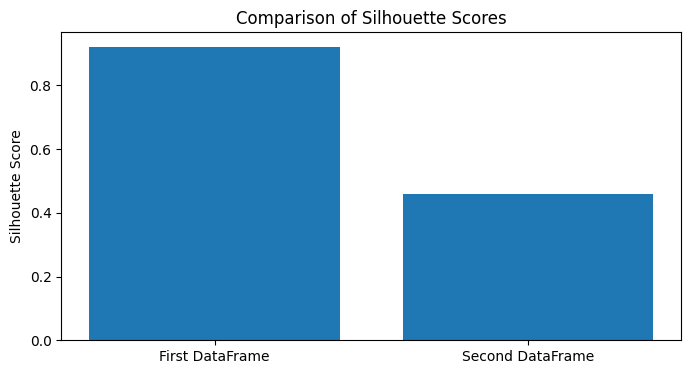

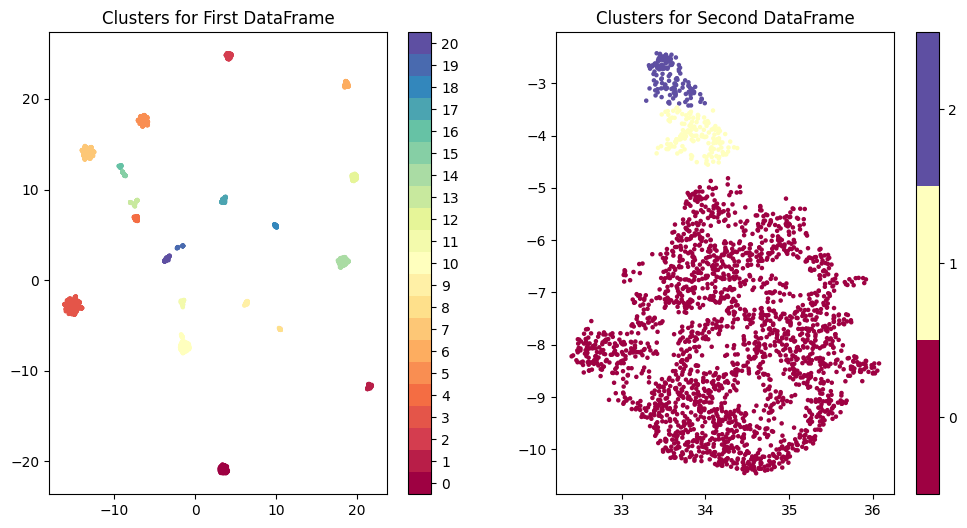

In [7]:
def cluster_comparison(df1, df2):
    df1, df2 = drop_na_values(df1, df2)
    
    df1_umap = perform_umap(df1, n_neighbors=best_params['n_neighbors'], min_dist=best_params['min_dist'])
    df2_umap = perform_umap(df2, n_neighbors=best_params['n_neighbors'], min_dist=best_params['min_dist'])
    
    labels1 = perform_hdbscan(df1_umap, min_cluster_size=best_params['min_cluster_size'])
    labels2 = perform_hdbscan(df2_umap, min_cluster_size=best_params['min_cluster_size'])
    
    silhouette_df1 = calculate_silhouette(df1_umap, labels1)
    silhouette_df2 = calculate_silhouette(df2_umap, labels2)
    
    print(f"Silhouette score for the first dataframe: {silhouette_df1}")
    print(f"Silhouette score for the second dataframe: {silhouette_df2}")
    
    plt.figure(figsize=(8, 4))
    plt.bar(['First DataFrame', 'Second DataFrame'], [silhouette_df1, silhouette_df2])
    plt.ylabel('Silhouette Score')
    plt.title('Comparison of Silhouette Scores')
    plt.show()
    
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plot_clusters(df1_umap, labels1, 'Clusters for First DataFrame')
    
    plt.subplot(1, 2, 2)
    plot_clusters(df2_umap, labels2, 'Clusters for Second DataFrame')
    
    plt.show()

cluster_comparison(data_symp_groups, data_symp_groups_all)
